# Autotrader Machine Learning Project

The objective of this machine learning project is to predict the price of a car based on various features including mileage, year, make, model, and trim. The model is trained using data collected from autotraders website through web scraping. Multiple models are tested to identify the best-performing one, which will then be implemented for the final prediction task.

## Importing data

In [42]:
#For preparing and visualizing data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For building ML models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
import xgboost as xgb

In [2]:
#import final dataset
df = pd.read_excel("FinalData.xlsx") 
df = df.drop('Unnamed: 0', axis=1)

In [3]:
#visualize cleaned datafame
display(df)

,make,model,trim,final_trim,year,price,location,mileage,transmission,drivetrain,...,fuel type,status,exterior colour,interior colour,doors,vin,vehicleAge,priceAnalysis,priceAnalysisDescription,carfax
0,toyota,corolla,cvt le chris 236-992-9266 super low kms,le,2014,19800,Richmond,10500,CVT,FWD,...,Gas,Used,NaN,NaN,4,2T1BURHE4EC120866,NaN,GreatPrice,"$1,016 BELOW MARKET",BuyCarFax
1,toyota,corolla,\tce bluetooth*camera recul*automatique\t,ce,2018,18995,Charlemagne,87178,Automatic,FWD,...,Gas,Used,Alpine White,NaN,4,2T1BURHE6JC969312,NaN,GreatPrice,"$1,927 BELOW MARKET",BuyCarFax
2,toyota,corolla,\tce bluetooth*camera recul*demarreur*auto\t,ce,2019,19995,Charlemagne,108629,Automatic,FWD,...,Gas,Used,Super White,NaN,4,2T1BURHE2KC155045,NaN,NaN,NaN,BuyCarFax
3,toyota,corolla,\tl bluetooth*camera recul* automatique\t,l,2020,22995,Charlemagne,82584,Automatic,NaN,...,Gas,Used,White,NaN,4,5YFBPRBE5LP020546,NaN,NaN,NaN,BuyCarFax
4,toyota,corolla,\tl bluetooth*camera recul*demarreur distance*\t,l,2020,23495,Charlemagne,65000,Automatic,NaN,...,Gas,Used,Blueprint,NaN,4,5YFBPRBE1LP041040,NaN,GreatPrice,"$1,594 BELOW MARKET",BuyCarFax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33325,volkswagen,atlas,trendline 4motion mags 18 7 passagers carplay,trendline,2022,38999,Ile-Perrot,16434,Automatic,AWD,...,Gas,Used,Deep Black Pearl,Black,4,1V2GP2CA6NC547644,NaN,GreatPrice,"$3,850 BELOW MARKET",ViewCarFaxWithLead
33326,volkswagen,atlas,"trendline awd heated seats, seven seater",trendline,2019,33098,Kelowna,68037,8 Speed Automatic,AWD,...,Gas,Used,Platinum Gray Metallic,Grey,4,1V2HR2CA1KC520989,NaN,GreatPrice,"$3,021 BELOW MARKET",FreeCarFax
33327,volkswagen,atlas,trendline l best price in alberta,trendline,2019,32889,Calgary,65044,Automatic,AWD,...,Gas,Used,Deep Black Pearl,NaN,4,1V2GR2CA7KC520247,NaN,GreatPrice,"$4,366 BELOW MARKET",FreeCarFax
33328,volkswagen,atlas,trendline v6+mags+4motion+hitch+led,trendline,2019,28995,Lachute,82000,8 Speed Automatic,AWD,...,Gas,Used,Dark Grey,Black,4,1V2HR2CA0KC555782,NaN,GreatPrice,"$2,871 BELOW MARKET",RequestCarFax


## Visualizing the data

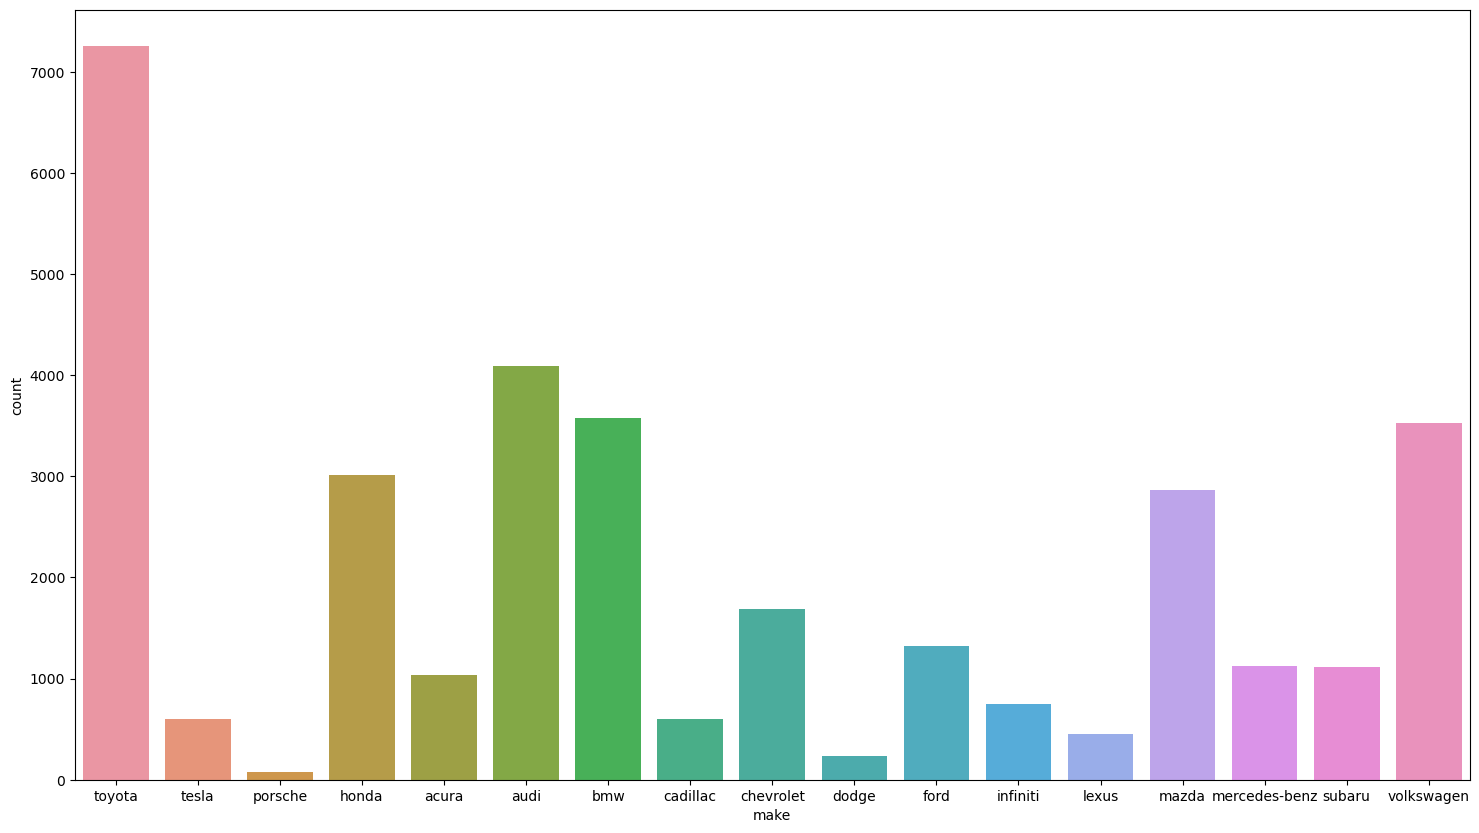

In [6]:
#visualize number of cars for each make
plt.figure(figsize=(18,10))
sns.countplot(df, x="make");

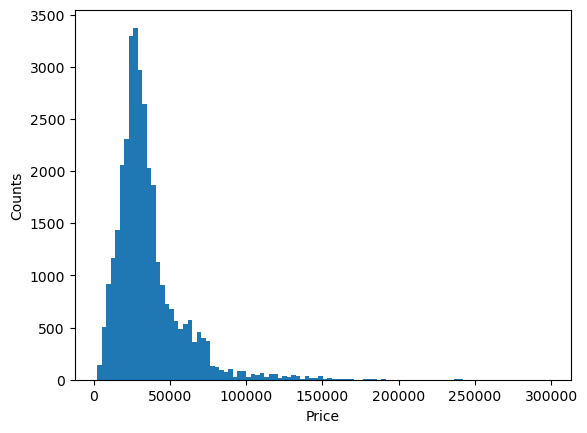

In [6]:
#visualize price distribution
price_arr = df['price'].to_numpy()
plt.hist(price_arr, density=False, bins=100)
plt.ylabel('Counts')
plt.xlabel('Price');

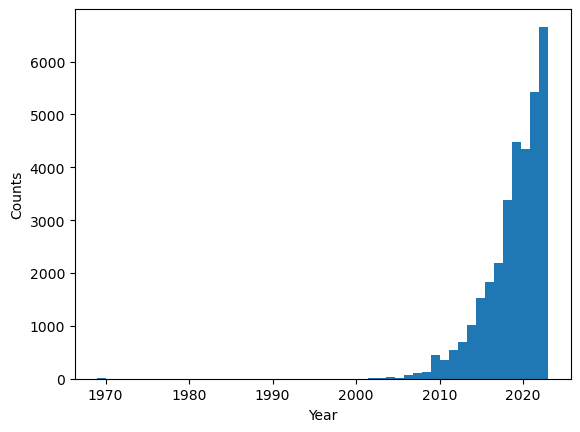

In [7]:
#visualize year distribution
year_arr = df['year'].to_numpy()
plt.hist(year_arr, density=False, bins=50)
plt.ylabel('Counts')
plt.xlabel('Year');

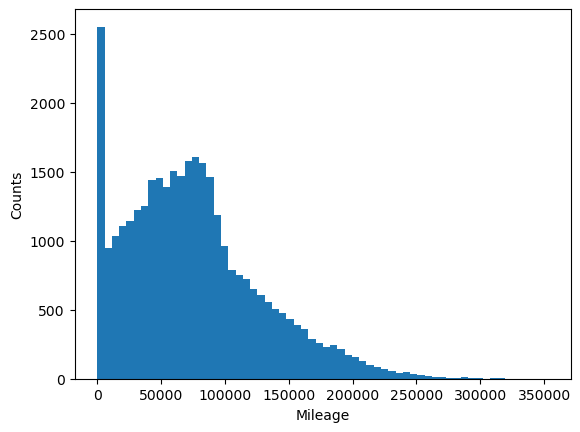

In [8]:
#visualize mileage distribution
mileage_arr = np.sort(df['mileage'].to_numpy())
plt.hist(mileage_arr , density=False, bins=62) 
plt.ylabel('Counts')
plt.xlabel('Mileage');

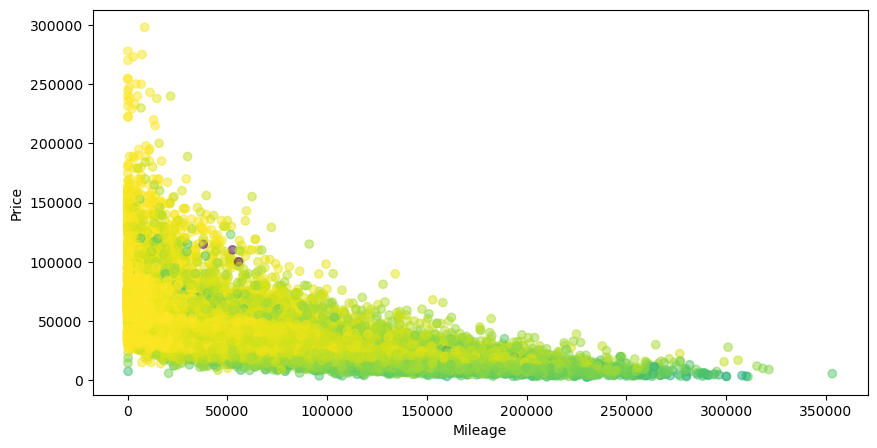

In [19]:
#visualize mileage vs price
plt.scatter(df['mileage'],df['price'], c= df['year'],alpha = 0.5)
plt.rcParams["figure.figsize"] = (10,5)
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.show() 

## Feature engineering

In [11]:
x = np.array(df['mileage'])
y = np.array(df['price'])
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

#get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.4, random_state=12) #80%

#split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=12)

#delete temporary variables
del x_, y_

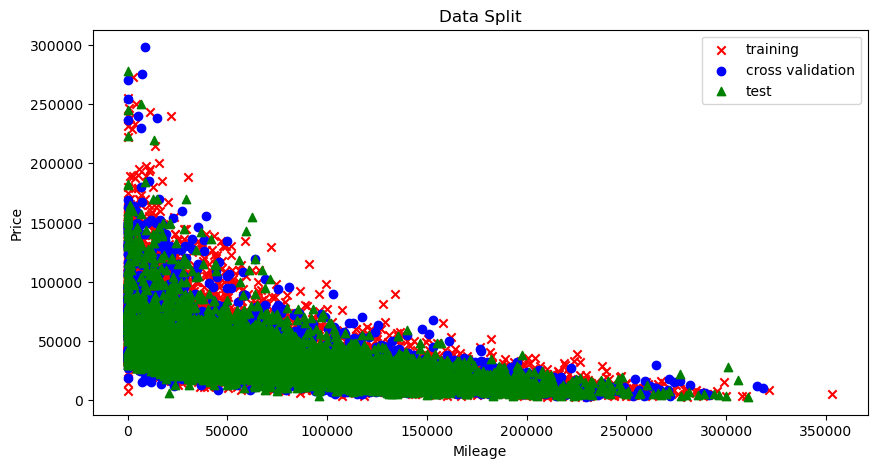

In [12]:
#visualize testing breakdown
plt.scatter(x_train, y_train, marker='x', c='r', label='training'); 
plt.scatter(x_cv, y_cv, marker='o', c='b', label='cross validation'); 
plt.scatter(x_test, y_test, marker='^', c='g', label='test'); 
plt.title("Data Split")
plt.xlabel("Mileage"); 
plt.ylabel("Price"); 
plt.legend()
plt.show()

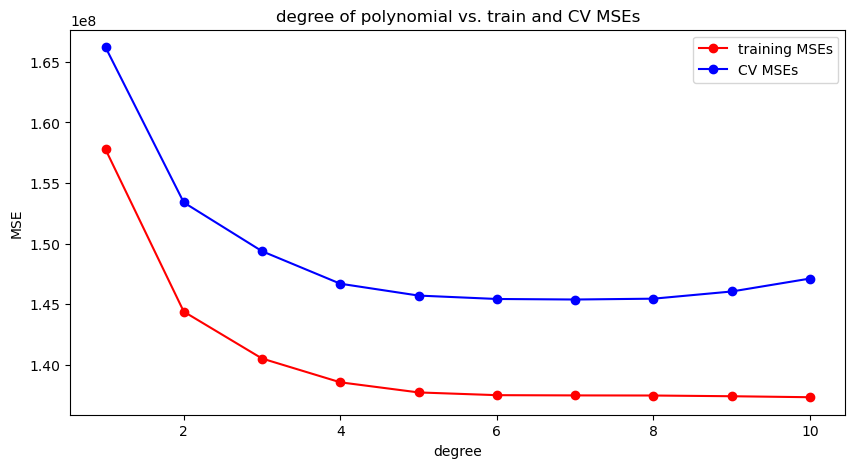

In [13]:
train_mses = []
cv_mses = []
models = []
scalers = []

#loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    #add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    #scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    #create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train) #removed _scaled
    models.append(model)
    
    #compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)#removed scaled
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    #add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    
    scaler_poly = StandardScaler()
    X_cv_mapped_scaled = scaler_poly.fit_transform(X_cv_mapped)
    
    #compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)#removed scaled
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
#plot the results
degrees=range(1,11)
plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
plt.title("degree of polynomial vs. train and CV MSEs")
plt.xlabel("degree"); 
plt.ylabel("MSE"); 
plt.legend()
plt.show()

In [14]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=7


In [15]:
#add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

#scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

#compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 137468716.87
Cross Validation MSE: 145385145.01
Test MSE: 133315036.95


The polynomial that fits the data best is a polynomial with degree 7. This was determined by fitting a linear regression model with varying degrees to see how well it fits the data. The model looked at both training and cv errors to find the best fit. The degree with the lowest cv error provides the best fit because it ensures that the polynomial accurately fits the data without overfitting. It is important to note that the model looks at all price and mileage data to determine the best fit. This means that while the overall fit is degree 7 certain car models may not fit this curve well. Some models may be more linear while some may be less linear, however the idea is to find one curve that should generally fit cars well. This is needed to find the best model for the regression models that will be built below.

## Finding optimal model

In the final model the user will provide an input for the car make, model, trim, and year. The model will then provide a predicted price. To find the most accurate price each car needs to be forecasted independently. This means that a different fit needs to be made on each category. For example, if we want to predict the price of a 2017 Toyota Camry le. Then all data on 2017 Toyota Camry le's will be used to form a prediction on that specific vehicle. This is why each category will be one hot encoded. Ideally the model will be able to isolate and aggregate categories to form predictions. This will allow more accurate predictions by generating specialized models for each combination of categories.  

In [32]:
#set up data
df = df.sort_values('mileage',ascending = True)
df_hot = df[['make', 'model','final_trim','year']]
one_hot_encoded_data = pd.get_dummies(df_hot, columns = ['make', 'model','final_trim','year'],dtype=int)
one_hot_arr = one_hot_encoded_data.to_numpy()

x = np.array(df['mileage'])
y = np.array(df['price'])
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

#print(f"the shape of the inputs x is: {x.shape}")
#print(f"the shape of the targets y is: {y.shape}")

#add polynomial features
degree = 7
poly = PolynomialFeatures(degree, include_bias=False)
X = poly.fit_transform(x)

#scale the data
scaler_poly = StandardScaler()
#scaler_poly = RobustScaler()
X_scaled = scaler_poly.fit_transform(X)

#create final data form
model_data = np.concatenate((X_scaled, one_hot_arr), axis=1)

#split data into training and testing(CV) data
X_train, X_test, y_train, y_test = train_test_split(model_data, y, test_size=0.2, random_state=40)

### Linear regression model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
#compute the training MSE
yhat = model.predict(X_train)
train_mse = mean_squared_error(y_train, yhat) / 2

#compute the cross validation MSE
yhat_ = model.predict(X_test)#removed scaled
cv_mse = mean_squared_error(y_test, yhat_) / 2

print(f"Training MSE: {train_mse:,.2f}")
print(f"Cross Validation MSE: {cv_mse:,.2f}")

Training MSE: 15,284,189.91
Cross Validation MSE: 78,231,314,148,878,960,295,936.00


The linear regression model is not effective at predicting car prices given the categorical features.  The cv error shows that the model does not fit new data well. This indicates that using the polynomial features which fit the overall data well does not do a good job at predicting specific vehicles. It is possible that the polynomial is causing a significant amount of overfitting. It can also indicate that the regression model has trouble handling the 541 features. A lasso regression may be a better option since it is more robust given a higher number of features and can use regularization to help fit the data better.

### Lasso regression model

In [ ]:
#lasso Regression model
lasso = Lasso(max_iter=35000,tol=1e-2)

#Define a grid of alpha values to search
#alphas = [0.001, 0.01, 0.1, 1, 10, 100]
alphas = [0.1, 0.2, 0.3, 0.4]

#create a parameter grid
param_grid = {'alpha': alphas}

#grid Search with Cross-Validation
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

#get the best alpha and corresponding model
best_alpha = grid_search.best_params_['alpha']
best_lasso = grid_search.best_estimator_

#evaluate the model on the test set
y_pred = best_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

#print(f'Best Alpha: {best_alpha}')
#print(f'Mean Squared Error on Test Set: {mse}')

In [7]:
best_alpha = 0.3
full_model = Lasso(alpha= best_alpha ,max_iter=90000, tol=1e-2)
full_model.fit(X_train, y_train)

Lasso(alpha=0.3, max_iter=90000, tol=0.01)

In [40]:
#compute the training MSE
yhat = full_model.predict(X_train)
train_mse = mean_squared_error(y_train, yhat) / 2

#compute the cross validation MSE
yhat = full_model.predict(X_test)#removed scaled
cv_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mse:,.2f}")
print(f"Cross Validation MSE: {cv_mse:,.2f}")

Training MSE: 16,099,038.82
Cross Validation MSE: 17,290,017.73


The Lasso regression model fits the data much better than the linear regression model. It looks to be handling the number of features well. The cv error is not that much greater than the training error which means that the models is likely not overfitting the model. 

### Stratified regression

In [38]:
grouped = df.groupby(['make', 'model', 'final_trim', 'year'])

#iterate through groups and create individual DataFrames
individual_dfs = []
for group_name, group_df in grouped:
    if (len(group_df) > 15):
        individual_dfs.append((group_name, group_df.copy()))   

In [43]:
train_mse_lst = []
cv_mse_lst = []

#access individual DataFrames
for group_name, individual_df in individual_dfs:
    x = np.array(individual_df['mileage'])
    y = np.array(individual_df['price'])
    x = np.expand_dims(x, axis=1)
    y = np.expand_dims(y, axis=1)

    #split data into training and testing(CV) data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
    
    #create a pipeline with PolynomialFeatures and LinearRegression
    model = make_pipeline(PolynomialFeatures(), LinearRegression())

    #define the parameter grid for PolynomialFeatures' degree
    param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8]}  # Any higher polynomial is likely to overfit the data

    #perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    #get the best degree from the grid search
    best_degree = grid_search.best_params_['polynomialfeatures__degree']

    #now take best degree and build the model
    #add polynomial features
    degree = best_degree 
    poly = PolynomialFeatures(degree, include_bias=False)
    X = poly.fit_transform(x)

    #scale the data
    scaler_poly = StandardScaler()
    X_scaled = scaler_poly.fit_transform(X)
    
    #redifine train and test set
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)
    
    #build model for individual df using training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #compute the training MSE
    yhat = model.predict(X_train)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mse_lst.append(train_mse)

    #compute the cross validation MSE
    yhat = model.predict(X_test)#removed scaled
    cv_mse = mean_squared_error(y_test, yhat) / 2
    cv_mse_lst.append(cv_mse)  

In [44]:
#calculate total training error and cv error
total_training_error = sum(train_mse_lst) / len(train_mse_lst)
total_cv_error = sum(cv_mse_lst) / len(cv_mse_lst)

print(f"Training MSE: {total_training_error:,.2f}")
print(f"Cross Validation MSE: {total_cv_error :,.2f}")

Training MSE: 3,698,666.52
Cross Validation MSE: 527,019,169,650.71


The stratified regression model essentially creates a different regression model for each category. The model also automatically finds the best fitting polynomial feature for each category. This reduces the number of features that would have to go into the linear regression model to get an output of a specific vehicle. It also provides a custom polynomial fit rather than a general fit. This does indeed produce better results in comparison to the linear regression model tested earlier. Unfortunately, there still seems to be quite a lot of overfittings as new data produces high errors. This can be seen in the total cv error. 

### XGBoost

In [45]:
#set up data
df = df.sort_values('mileage',ascending = True)
df_hot = df[['make', 'model','final_trim','year']]
one_hot_encoded_data = pd.get_dummies(df_hot, columns = ['make', 'model','final_trim','year'],dtype=int)
one_hot_arr = one_hot_encoded_data.to_numpy()

x = np.array(df['mileage'])
y = np.array(df['price'])
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)


#create final data form
model_data = np.concatenate((x, one_hot_arr), axis=1)

#split data into training and testing(CV) data
X_train, X_test, y_train, y_test = train_test_split(model_data, y, test_size=0.2, random_state=40)

In [5]:
xgb_model = xgb.XGBRegressor()

#define the hyperparameter search space
param_grid = {'learning_rate': [0.1, 0.2, 0.3],
              'max_depth': [4, 5, 6, 7],
              'n_estimators':  [400, 500, 600],
              'subsample': [0.8, 0.9, 1.0],
              'colsample_bytree': [0.8, 0.9, 1.0],
              'reg_alpha': [0, 0.1, 0.5, 1, 1.5, 2] 
             }
#create a cross-validation object
cv_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

#fit the model with cross-validation
cv_xgb.fit(X_train, y_train)

#access the best model and its hyperparameters
best_xgb_model = cv_xgb.best_estimator_
best_params = cv_xgb.best_params_

#evaluate the best model on the validation set
y_pred_val = best_xgb_model.predict(X_test)
validation_error = mean_squared_error(y_test, y_pred_val)
print(f'Best XGBoost Model Parameters: {best_params}')
#print(f'Validation Mean Squared Error: {validation_error}')

Best XGBoost Model Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 600, 'reg_alpha': 0, 'subsample': 1.0}


In [46]:
#different versions
#best_params_1 = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
#best_params_2 = {'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.9}
best_params_3 = {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 600, 'reg_alpha': 0, 'subsample': 1.0}


#create and fit the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_params_3)
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
#compute the training MSE
yhat = best_xgb_model.predict(X_train)
train_mse = mean_squared_error(y_train, yhat) / 2

#compute the cross validation MSE
yhat = best_xgb_model.predict(X_test)#removed scaled
cv_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mse:,.2f}")
print(f"Cross Validation MSE: {cv_mse:,.2f}")

Training MSE: 4,393,251.75
Cross Validation MSE: 8,505,586.15


The XGBoost model generates the best results when compared to other models. While the training error may be a little bit worse than the stratified regression model the cv error is significantly better. This is impressive considering the model is factoring in all categorical features rather than specific models being generated for each category. The model has been tuned using multiple hyperparameters to provide the best fit and yield the best results. 

## Train and visualize model

### Training

The hyperparameters found on the training set will be used in the final model. The final model will be created using the entire dataset rather than just the training data. The most effective hyperparameters found earlier should increase the model’s performance by reducing overfitting on new data. Utilizing more data will help make the models accuracy by factoring in more training example. This is especially true considering the large number of categorical features. If some categories have smaller sample sizes, then the model may overfit certain car makes. This is why the full dataset should be used in the final model. 

In [48]:
#set up data
df = df.sort_values('mileage',ascending = True)
df_hot = df[['make', 'model','final_trim','year']]
one_hot_encoded_data = pd.get_dummies(df_hot, columns = ['make', 'model','final_trim','year'],dtype=int)
one_hot_arr = one_hot_encoded_data.to_numpy()

x = np.array(df['mileage'])
y = np.array(df['price'])
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

#create final data input
model_data = np.concatenate((x, one_hot_arr), axis=1)

In [49]:
#best hyperparameters found earlier
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 600, 'reg_alpha': 0, 'subsample': 1.0}

#create and fit the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(model_data, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Visualizing the model

#### User input

In [80]:
make = 'volkswagen'
model = 'golf gti'
year = 2015
final_trim = 'autobahn'
mileage = 100000


#testing examples:

# make = 'toyota'
# model = 'corolla'
# year = 2019
# final_trim = 'se'
# mileage = 50000

# make = 'tesla'
# model = 'model 3'
# year = 2020
# final_trim = 'standard range plus'

In [81]:
#input format
make_i = 'make_' + make
model_i = 'model_' + model
year_i = 'year_' + str(year)
final_trim_i = 'final_trim_ '+ final_trim + ' '

In [82]:
#testing how the model fits a certain car
full_df_hot = df[['mileage','price','make', 'model','final_trim','year']]
full_one_hot = pd.get_dummies(full_df_hot , columns = ['make', 'model','final_trim','year'],dtype=int)

#find specific vehicle
specific_vehicle = full_one_hot[(full_one_hot[make_i]== 1) & (full_one_hot[model_i]== 1) & (full_one_hot[year_i]== 1) & (full_one_hot[final_trim_i]== 1)]

#specific_vehicle processing
x = np.array(specific_vehicle['mileage'])
y = np.array(specific_vehicle['price'])
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

#tranforming data into model input format
specific_vehicle_hot = specific_vehicle.drop(columns=['price', 'mileage'], axis=1)
specific_vehicle_hot_arr = specific_vehicle_hot.to_numpy()
specific_data = np.concatenate((x, specific_vehicle_hot_arr), axis=1)
predicted_price_data = np.append(mileage, specific_vehicle_hot_arr[0])
pred = np.expand_dims(predicted_price_data , axis=0)

In [83]:
#models prediction on entire dataset
yhat = best_xgb_model.predict(specific_data)

#models prediction on user input
pred_price = best_xgb_model.predict(pred)

#building the line of prediction
m = np.append(x, [mileage])
x_ = np.expand_dims(m, axis=1)
x_d = pd.DataFrame(x_)
m2 = np.append(yhat, [pred_price])
y_ = np.expand_dims(m2, axis=1)
y_d = pd.DataFrame(y_)

#formatting
result_df = pd.concat([x_d, y_d], axis=1)
result_df.columns = ['mileage', 'price']
result_df = result_df.sort_values('mileage',ascending = True)

#final input format
x_ = result_df['mileage']
y_hat = result_df['price']

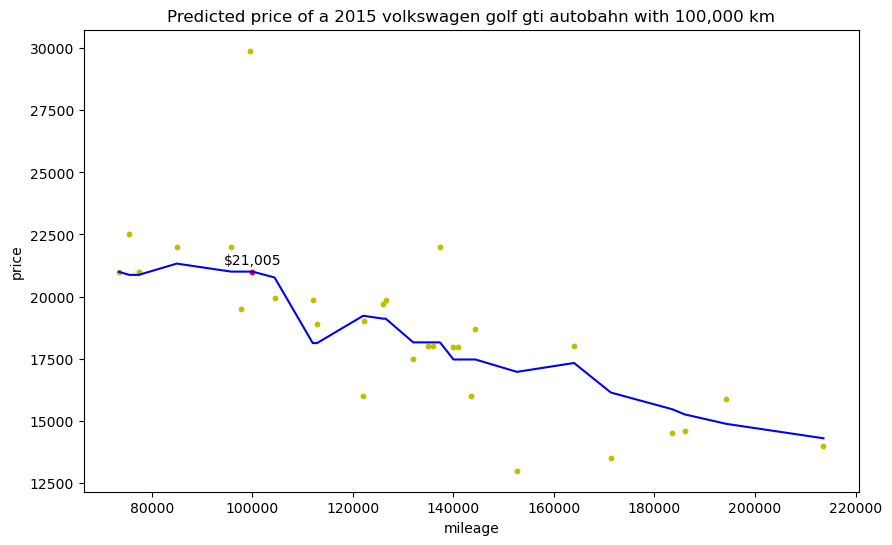

In [84]:
#plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color ='y', s=10)
plt.scatter(mileage, pred_price, color ='r', s=10)
plt.annotate(f'${int(pred_price):,}', (mileage, int(pred_price)), textcoords="offset points", xytext=(0,5), ha='center')
plt.plot(x_ ,y_hat, color ='b')
plt.title('Predicted price of a' + ' ' + str(year) + ' ' + make + ' ' + model + ' ' + final_trim + f" with {mileage:,}" + ' km')
plt.xlabel("mileage"); 
plt.ylabel("price");
plt.show()

A specific vehicle is defined by its make, model, trim, and year. The graph demonstrates how the model fits a specific vehicle given the mileage of that vehicle. The model does a good job at fitting the data, more regularization may be helpful to further smooth out the data however it leads to worse model performance. Overall, the model seems to do a good job at predicting the price of this vehicle. 

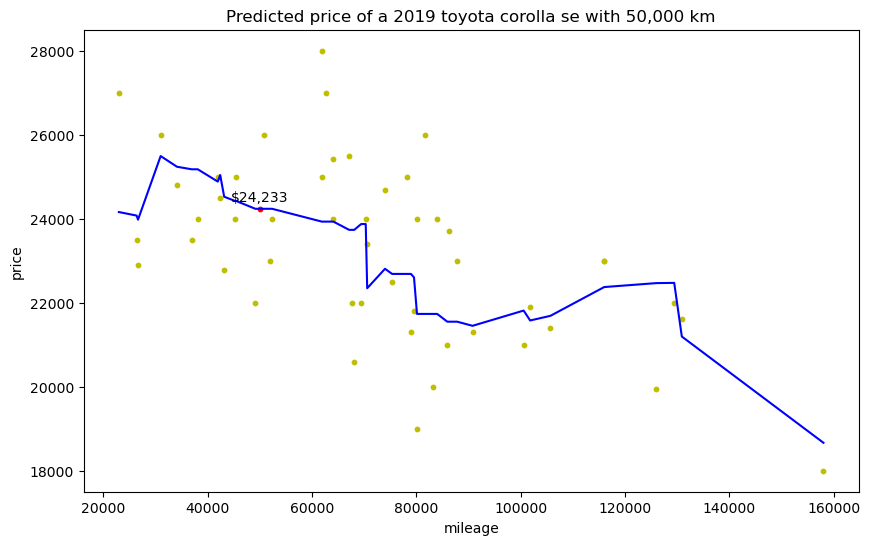

In [78]:
#plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color ='y', s=10)
plt.scatter(mileage, pred_price, color ='r', s=10)
plt.annotate(f'${int(pred_price):,}', (mileage, int(pred_price)), textcoords="offset points", xytext=(0,5), ha='center')
plt.plot(x_ ,y_hat, color ='b')
plt.title('Predicted price of a' + ' ' + str(year) + ' ' + make + ' ' + model + ' ' + final_trim + f" with {mileage:,}" + ' km')
plt.xlabel("mileage"); 
plt.ylabel("price");
plt.show()

This data is much less linear, yet the model still does a good job at predicting the price. The model can pick up on complicated data trends seen for certain vehicles. Overall, the model does a good job in determining the price of specific vehicles. 